In [1]:
import restructure_data
import feature_engineer

In [2]:
data = restructure_data.DataRestructuring(df_train_path=r'D:\Gallon\Project\07_E_SUN_2021_Winter_AI\data\tbrain_cc_training_48tags_hash_final.csv',
                         df_test_path=r'D:\Gallon\Project\07_E_SUN_2021_Winter_AI\data\需預測的顧客名單及提交檔案範例.csv',
                    start_index=0,
                    number=10000)
data.execute()

2021-12-30 13:37:58,194-INFO-Start reading test data.
2021-12-30 13:37:58,538-INFO-Test data shape: (10000, 4)
2021-12-30 13:37:58,539-INFO-Finish reading test data.
2021-12-30 13:37:58,539-INFO-Start reading train data.


Iteration is stopped.
Memory usage of dataframe is 174.56 MB


2021-12-30 13:41:49,726-INFO-Finish reading train data.
2021-12-30 13:41:49,749-INFO-Start creating training matrix.


Memory usage after optimization is: 56.09 MB
Decreased by 67.9%
Memory usage of dataframe is 1164.55 MB
Memory usage after optimization is: 487.06 MB
Decreased by 58.2%


2021-12-30 13:42:42,620-INFO-Finish creating training matrix.


In [35]:
# import importlib
# importlib.reload(feature_engineer)

<module 'feature_engineer' from 'c:\\Users\\RT009223\\Github\\Projects\\SideProject\\07_E_SUN_2021_Winter_AI\\feature_engineer.py'>

2021-12-30 13:52:51,540-INFO-Start month feature engineering.
2021-12-30 13:52:52,340-INFO-Finish month feature engineering.
2021-12-30 13:52:52,341-INFO-Start shop tagging engineering.
2021-12-30 13:53:04,929-INFO-Finish shop tagging engineering.
2021-12-30 13:53:04,930-INFO-Start clustering feature engineering.
2021-12-30 13:53:11,105-INFO-Finish clustering feature engineering.
2021-12-30 13:53:11,106-INFO-Start percentage changing feature engineering.


Adding feature shop_tag_txn_amt_mean_delta_1_lag_1
Adding feature shop_tag_txn_amt_mean_delta_1_lag_12
Adding feature chid_txn_amt_mean_delta_1_lag_1
Adding feature chid_txn_amt_mean_delta_1_lag_12
Adding feature educd_txn_amt_mean_delta_1_lag_1
Adding feature trdtp_txn_amt_mean_delta_1_lag_1
Adding feature gender_code_txn_amt_mean_delta_1_lag_1
Adding feature age_txn_amt_mean_delta_1_lag_1


2021-12-30 13:54:19,778-INFO-Finish percentage changing feature engineering.
2021-12-30 13:54:19,779-INFO-Start rolling feature engineering.


Creating feature "chid_shop_tag_txn_amt_mean_rolling_mean_win_12"
Creating feature "chid_shop_tag_txn_amt_mean_expanding_mean"
Creating feature "chid_shop_tag_txn_amt_mean_ewm_hl_1"
Creating feature "age_shop_tag_txn_amt_mean_rolling_mean_win_12"
Creating feature "age_shop_tag_txn_amt_mean_expanding_mean"
Creating feature "age_shop_tag_txn_amt_mean_ewm_hl_1"
Creating feature "age_gender_code_shop_tag_txn_amt_mean_rolling_mean_win_12"
Creating feature "age_gender_code_shop_tag_txn_amt_mean_expanding_mean"
Creating feature "age_gender_code_shop_tag_txn_amt_mean_ewm_hl_1"


2021-12-30 13:57:30,403-INFO-Finish rolling feature engineering.
2021-12-30 13:57:30,404-INFO-Start ME feature engineering.


Adding feature shop_tag_txn_amt_mean_lag_1
Adding feature shop_tag_cluster_txn_amt_mean_lag_1
Adding feature trdtp_txn_amt_mean_lag_1
Adding feature trdtp_cluster_txn_amt_mean_lag_1
Adding feature chid_txn_amt_mean_lag_1
Adding feature educd_txn_amt_mean_lag_1
Adding feature poscd_txn_amt_mean_lag_1
Adding feature masts_gender_code_age_txn_amt_mean_lag_1


2021-12-30 13:58:45,347-INFO-Finish ME feature engineering.


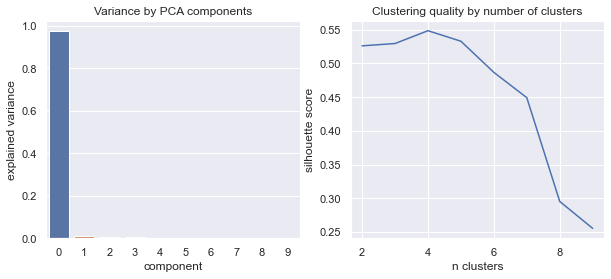

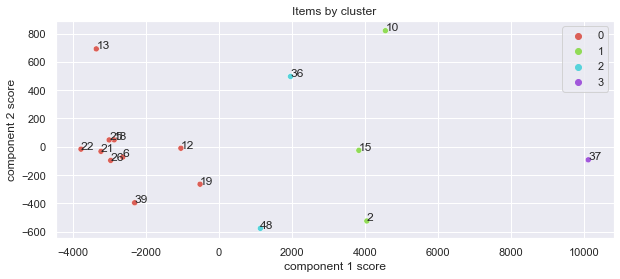

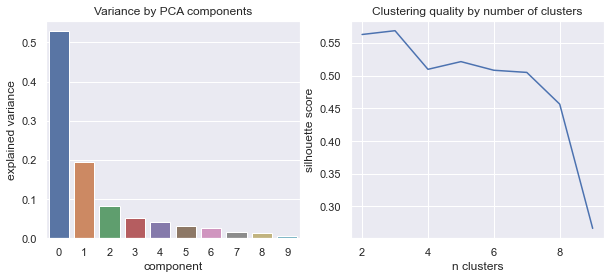

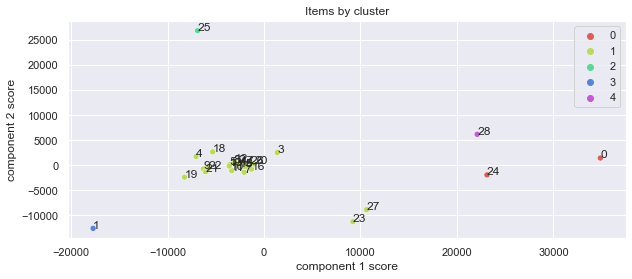

In [3]:
fe = feature_engineer.FeatureEngineering(matrix=data.matrix)
fe.execute()

In [4]:
matrix = fe.matrix.copy()

In [5]:
matrix.columns

Index(['dt', 'chid', 'shop_tag', 'txn_cnt', 'txn_amt', 'domestic_offline_cnt',
       'domestic_online_cnt', 'overseas_offline_cnt', 'overseas_online_cnt',
       'domestic_offline_amt_pct', 'domestic_online_amt_pct',
       'overseas_offline_amt_pct', 'overseas_online_amt_pct', 'card_1_txn_cnt',
       'card_2_txn_cnt', 'card_3_txn_cnt', 'card_4_txn_cnt', 'card_5_txn_cnt',
       'card_6_txn_cnt', 'card_7_txn_cnt', 'card_8_txn_cnt', 'card_9_txn_cnt',
       'card_10_txn_cnt', 'card_11_txn_cnt', 'card_12_txn_cnt',
       'card_13_txn_cnt', 'card_14_txn_cnt', 'card_other_txn_cnt',
       'card_1_txn_amt_pct', 'card_2_txn_amt_pct', 'card_3_txn_amt_pct',
       'card_4_txn_amt_pct', 'card_5_txn_amt_pct', 'card_6_txn_amt_pct',
       'card_7_txn_amt_pct', 'card_8_txn_amt_pct', 'card_9_txn_amt_pct',
       'card_10_txn_amt_pct', 'card_11_txn_amt_pct', 'card_12_txn_amt_pct',
       'card_13_txn_amt_pct', 'card_14_txn_amt_pct', 'card_other_txn_amt_pct',
       'masts', 'educd', 'trdtp', 'naty

In [6]:
surplus_columns = [
    "masts",
    "educd",
    "trdtp",
    "naty",
    "poscd",
    "gender_code"
]
matrix = matrix.drop(columns=surplus_columns)

In [7]:
matrix.shape

(3840000, 77)

In [8]:
# matrix.query('txn_amt>0')['txn_amt'].describe()
matrix['txn_amt'] = matrix['txn_amt'].clip(0, 20000)

In [9]:
import warnings

warnings.filterwarnings("ignore", module="lightgbm")

import lightgbm as lgbm


def fit_booster(
    X_train,
    y_train,
    X_test=None,
    y_test=None,
    params=None,
    test_run=False,
    categoricals=[],
    dropcols=[],
    early_stopping=True,
):
    if params is None:
        params = {"learning_rate": 0.1, "subsample_for_bin": 300000, "n_estimators": 50}

    early_stopping_rounds = None
    if early_stopping == True:
        early_stopping_rounds = 30

    if test_run:
        eval_set = [(X_train, y_train)]
    else:
        eval_set = [(X_train, y_train), (X_test, y_test)]

    booster = lgbm.LGBMRegressor(**params)

    categoricals = [c for c in categoricals if c in X_train.columns]

    booster.fit(
        X_train,
        y_train,
        eval_set=eval_set,
        eval_metric=["rmse"],
        verbose=100,
        categorical_feature=categoricals,
        early_stopping_rounds=early_stopping_rounds,
    )

    return booster

In [10]:
keep_from_month = 2  # The first couple of months are dropped because of distortions to their features (e.g. wrong item age)
test_month = 24
dropcols = [
    "chid",
    "shop_tag",
]  # The features are dropped to reduce overfitting

valid = matrix.drop(columns=dropcols).loc[matrix.dt == test_month, :]
train = matrix.drop(columns=dropcols).loc[matrix.dt < test_month, :]
train = train[train.dt >= keep_from_month]
X_train = train.drop(columns="txn_amt")
y_train = train.txn_amt
X_valid = valid.drop(columns="txn_amt")
y_valid = valid.txn_amt
del matrix

In [11]:
params = {
    "num_leaves": 966,
    "cat_smooth": 45.01680827234465,
    "min_child_samples": 27,
    "min_child_weight": 0.021144950289224463,
    "max_bin": 214,
    "learning_rate": 0.01,
    "subsample_for_bin": 300000,
    "min_data_in_bin": 7,
    "colsample_bytree": 0.8,
    "subsample": 0.6,
    "subsample_freq": 5,
    "n_estimators": 8000,
}

In [12]:
categoricals = [
    'month',
    'shop_tag_cluster',
    'trdtp_cluster',
    'age',
    'cuorg'
]  # These features will be set as categorical features by LightGBM and handled differently

lgbooster = fit_booster(
    X_train,
    y_train,
    X_valid,
    y_valid,
    params=params,
    test_run=False,
    categoricals=categoricals,
)

MemoryError: Unable to allocate 994. MiB for an array with shape (74, 3520000) and data type float32